In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Presentation of the experiment

The goal of this project is to simulate the "Monty Hall Problem," a famous probability puzzle, and examine the effect of switching your initial choice on your probability of winning.

**Goal**:

In the Monty Hall Problem, a contestant is presented with three doors. Behind one door is a car, and behind the other two doors are goats. The contestant chooses a door, and then the host (Monty Hall) opens one of the other two doors, revealing a goat. The contestant is then given the option to stick with their original choice or switch to the other remaining door.

**The question is:** 

Does switching increase your chances of winning? This project simulates the game with two scenarios: one where the contestant switches and one where the contestant stays with their initial choice. We track the number of wins for each scenario and plot the success rates as the number of trials increases.

# Implementation of the experiment

In [3]:
def game(change):
    """
    Simulates one round of the Monty Hall game.
    
    Parameters:
        change (str): Either 'change' (if the player switches doors) or 'no_change' (if the player stays with their initial choice).
    
    Returns:
        str: Result of the game ('You won!' or 'You lost!').
    """
    # Define the doors
    doors = ['car', 'goat', 'goat']
    np.random.shuffle(doors)

    # Player's initial random choice
    door_place_choice = np.random.randint(0, 3)
    choice = doors[door_place_choice]
    
    # Find the door with the goat
    goat_door = 0
    for door in range(3):
        if door != door_place_choice and doors[door] == 'goat':
            goat_door = door
            break
    
    # If player decides to switch
    if change == 'change':
        for door in range(3):
            if door != door_place_choice and door != goat_door:
                door_place_choice2 = door
                choice2 = doors[door_place_choice2]
                break
    else:
        choice2 = choice  # Player does not switch
    
    # Determine if the player won or lost
    if choice2 == 'car':
        return 'You won!'
    else:
        return 'You lost!'

In [4]:
def gametest(change):
    """
    Visualizes each step of the Monty Hall game for debugging purposes.
    
    Parameters:
        change (str): Either 'change' (if the player switches doors) or 'no_change' (if the player stays with their initial choice).
    
    Returns:
        str: Result of the game ('You won!' or 'You lost!').
    """
    doors = ['car', 'goat', 'goat']
    np.random.shuffle(doors)
    print(doors)
 
    door_place_choice = np.random.randint(0, 3)
    choice = doors[door_place_choice]
    print(f"Initial choice: Door {door_place_choice} - {choice}")
    
    goat_door = 0
    for door in range(3):
        if door != door_place_choice and doors[door] == 'goat':
            goat_door = door
            break
    print(f"Goat door: Door {goat_door}")
    
    if change == 'change':
        for door in range(3):
            if door != door_place_choice and door != goat_door:
                door_place_choice2 = door
                choice2 = doors[door_place_choice2]
                break
        print(f"Switching to Door {door_place_choice2} - {choice2}")
    else:
        choice2 = choice
        print(f"Staying with Door {door_place_choice} - {choice}")
        
    if choice2 == 'car':
        return 'You won!\n'
    else:
        return 'You lost!\n'

In [5]:
def run_simulation(trials):
    """
    Runs the Monty Hall game simulation for a specified number of trials and calculates the win rates for both strategies.
    
    Parameters:
        trials (int): Number of trials to run in the simulation.
    
    Returns:
        tuple: Two lists containing the win rates for switching and not switching doors over the course of the trials.
    """
    wins_change_rate = []
    wins_no_change_rate = []

    for i in range(1, trials):
        wins_change = 0
        wins_no_change = 0

        for j in range(0, i):
            result_change = game('change')  # Simulate with changing the door
            result_no_change = game('no_change')  # Simulate without changing the door
            if result_change == 'You won!':
                wins_change += 1
            if result_no_change == 'You won!':
                wins_no_change += 1
            
        wins_change_rate.append(wins_change * 100 / i)
        wins_no_change_rate.append(wins_no_change * 100 / i)
    
    return wins_change_rate, wins_no_change_rate

In [8]:
def plot_win_rate(wins_change_rate, wins_no_change_rate, trials):
    """
    Plots the win rates for switching vs. not switching doors.
    
    Parameters:
        wins_change_rate (list): Win rates when switching doors.
        wins_no_change_rate (list): Win rates when not switching doors.
        trials (int): Number of trials for the simulation.
    """
    fig = plt.figure(figsize=(14, 8), facecolor='r', edgecolor='b', linewidth=7)
    ax = fig.add_axes([1, 1, 1, 1])
    plt.title('Win Rate Evolution Based on Number of Trials and Switching Choice', fontsize=15, color='black')
    ax.plot([i for i in range(1, trials)], wins_change_rate, 'b', label="With Switch")
    ax.plot([i for i in range(1, trials)], wins_no_change_rate, 'r', label="Without Switch")
    ax.legend(ncol=1)
    plt.show()

In [11]:
print(gametest('change'))

['car', 'goat', 'goat']
Initial choice: Door 0 - car
Goat door: Door 1
Switching to Door 2 - goat
You lost!



In [12]:
print(gametest('no_change'))

['car', 'goat', 'goat']
Initial choice: Door 0 - car
Goat door: Door 1
Staying with Door 0 - car
You won!



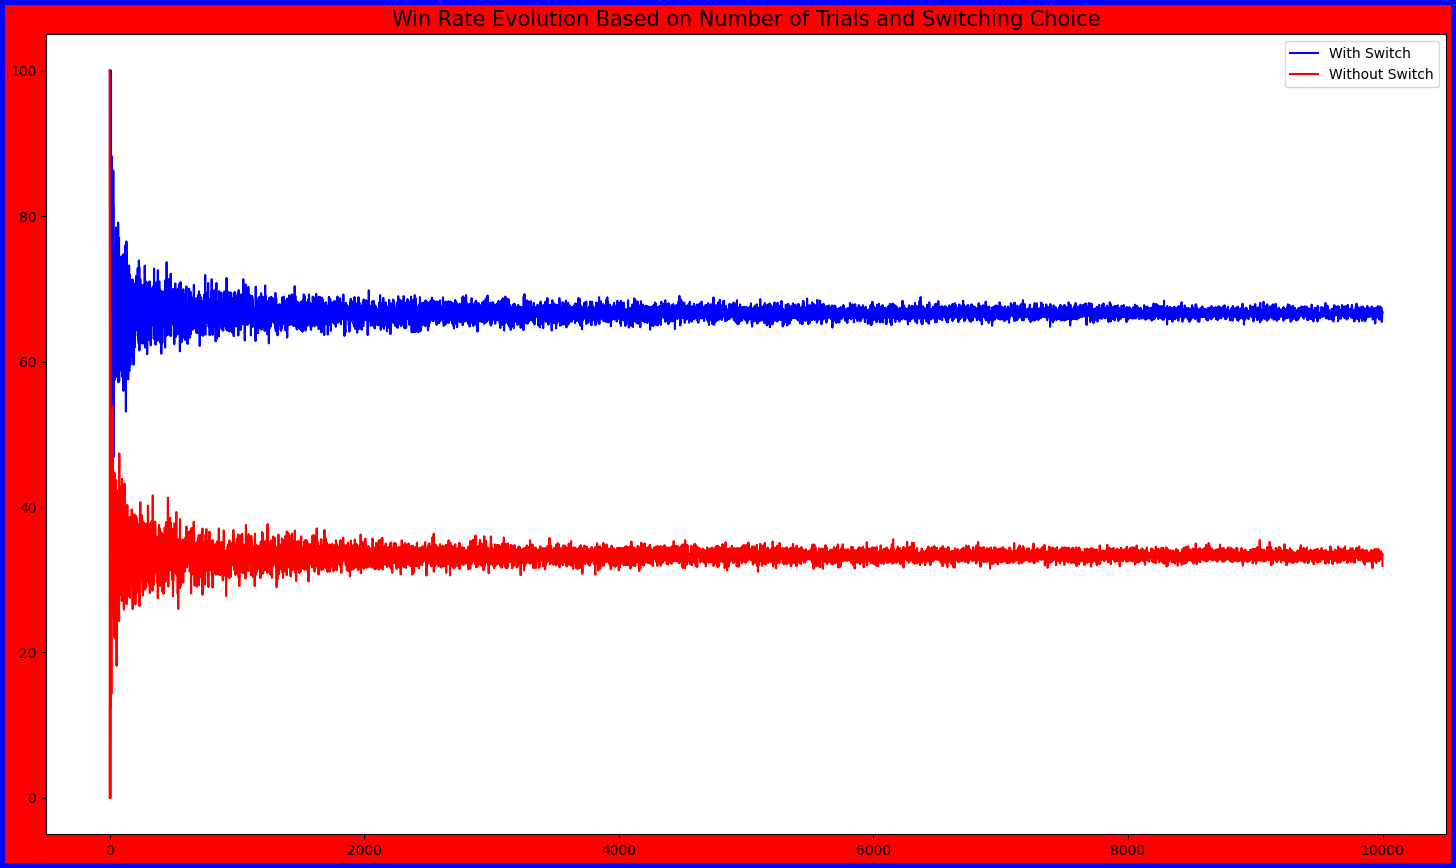

In [10]:
# Running the simulation for 1000 trials
trials = 10000
wins_change_rate, wins_no_change_rate = run_simulation(trials)

# Plotting the win rate evolution
plot_win_rate(wins_change_rate, wins_no_change_rate, trials)

# Results of the experiments

The results from the simulation and the plotted graph should reflect the well-known outcome of the Monty Hall Problem: **switching doors significantly improves the chances of winning.**

**Win Rate with Switching**: 

The blue line in the plot shows the win rate when the player switches doors. As the number of trials increases, the win rate approaches approximately 66%. This is because by switching, the player effectively has a 2/3 chance of winning, as they are more likely to switch to the car after Monty reveals a goat.

**Win Rate without Switching**:

 The red line represents the win rate when the player does not switch doors. As the number of trials increases, this win rate stabilizes at approximately 33%. This is because, when staying with the initial choice, the player only wins if they originally chose the car, which happens with a probability of 1/3.

**Interpretation of the Results**:

 The data confirms that the best strategy in this game is to always switch doors. This is because the initial choice has a 1/3 chance of being correct (choosing the car), while by switching, the probability of winning increases to 2/3. The graph illustrates that, over a large number of trials, the switching strategy consistently outperforms the no-switching strategy.

By running this simulation, we visually see how the win rate for the switch strategy converges to around 66% over time, while the no-switch strategy remains close to 33%. This outcome is a direct demonstration of the Monty Hall Problem and serves as a great example of how probability can be counterintuitive.